In [1]:
%pwd
%cd ../..

/Users/ryandevera/data-science/umn_environments/Deeplifting


In [2]:
import time
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)

In [3]:
problem_names = [
    'ackley',
    # 'bukin_n6',
    # 'cross_in_tray',
    # 'drop_wave',
    # 'eggholder',
    # 'griewank',
    # 'holder_table',
    # 'levy',
    # 'levy_n13',
    # 'rastrigin',
    # 'schaffer_n2',
    # 'schaffer_n4',
    # 'schwefel',
    # 'shubert',
]

In [4]:
problem_performance_list = []
trials = 2

for problem_name in problem_names:
    print(problem_name)
    # Setup the problem
    problem = PROBLEMS_BY_NAME[problem_name]

    # Get the known minimum
    minimum_value = problem['global_minimum']

    # First run IPOPT
    outputs_ipopt = run_ipopt(problem, trials=trials)

    # # Get the final results for all IPOPT runs
    # ipopt_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # ipopt_results['problem_name'] = problem_name
    # ipopt_results['hits'] = np.where(
    #     np.abs(ipopt_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add IPOPT to the problem_performance_list
    # problem_performance_list.append(ipopt_results)

    # Next add dual annealing
    outputs_dual_annealing = run_dual_annealing(problem, trials=trials)

    # # Get the final results for all dual annealing runs
    # dual_annleaing_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # dual_annleaing_results['problem_name'] = problem_name
    # dual_annleaing_results['hits'] = np.where(
    #     np.abs(dual_annleaing_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add dual annealing to the problem_performance_list
    # problem_performance_list.append(dual_annleaing_results)

    # Next add differential evolution
    outputs_differential_evolution = run_differential_evolution(problem, trials=trials)

    # # Get the final results for all differential evolution runs
    # differential_evolution_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # differential_evolution_results['problem_name'] = problem_name
    # differential_evolution_results['hits'] = np.where(
    #     np.abs(differential_evolution_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add differential evolution to the problem_performance_list
    # problem_performance_list.append(differential_evolution_results)

    # # Next add pygranso
    # outputs = run_pygranso(problem, trials=trials)

    # # Get the final results for all differential evolution runs
    # pygranso_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # pygranso_results['problem_name'] = problem_name
    # pygranso_results['hits'] = np.where(
    #     np.abs(pygranso_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add differential evolution to the problem_performance_list
    # problem_performance_list.append(pygranso_results)

    # # Finally, add deeplifting
    # outputs = run_deeplifting(problem, trials=trials)

    # # Get the final results for all differential evolution runs
    # deeplifting_results = pd.DataFrame(
    #     outputs['final_results'],
    #     columns=['x1', 'x2', 'f', 'algorithm', 'time']
    # )
    # deeplifting_results['problem_name'] = problem_name
    # deeplifting_results['hits'] = np.where(
    #     np.abs(deeplifting_results['f'] - minimum_value) <= 1e-4, 1, 0
    # )

    # # Add differential evolution to the problem_performance_list
    # problem_performance_list.append(deeplifting_results)

ackley

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



In [5]:
# results_df = pd.concat(problem_performance_list, ignore_index=True)

In [6]:
# performance_df = (
#     results_df
#     .groupby(['problem_name', 'algorithm'])
#     .agg({'hits': 'mean', 'time': 'sum'})
#     .reset_index()
#     .rename(columns={'hits': 'Success Rate', 'time': 'Total Run Time'})
# )

In [7]:
# performance_df

In [8]:
# performance_df = (
#     performance_df
#     .pivot_table(
#         index='problem_name',
#         columns='algorithm',
#         values=['Success Rate', 'Total Run Time']
#     )
#     .T
#     .reorder_levels(['algorithm', None])
#     .sort_index()
#     .T
# )

In [9]:
# performance_df = performance_df.apply(lambda x: np.round(x, 3))

In [10]:
# performance_df.to_csv('/Users/ryandevera/Desktop/deeplifting_results.csv')

In [11]:
# performance_df

In [12]:
outputs_ipopt

{'results': array([[[ 3.19904179, 14.10265031, 18.38559634],
         [ 3.1990418 , 14.10265031, 18.38559639],
         [ 3.19904179, 14.10265032, 18.38559638],
         ...,
         [        nan,         nan,         nan],
         [        nan,         nan,         nan],
         [        nan,         nan,         nan]],
 
        [[-5.4380459 , 14.439186  , 20.06610928],
         [-5.43804589, 14.439186  , 20.06610928],
         [-5.4380459 , 14.43918601, 20.06610929],
         ...,
         [        nan,         nan,         nan],
         [        nan,         nan,         nan],
         [        nan,         nan,         nan]]]),
 'final_results': [(-1.998054629294223,
   10.989292644720102,
   15.88202336698048,
   'IPOPT',
   0.03266191482543945),
  (-4.997831145906044,
   13.99392591234133,
   17.555578515670323,
   'IPOPT',
   0.019493818283081055)]}

In [13]:
index = 0
outputs_ipopt = outputs_ipopt['results'][index, :, :]

In [14]:
outputs_ipopt = outputs_ipopt[~np.isnan(outputs_ipopt).any(axis=1)]

In [15]:
midpoint = len(outputs_ipopt) // 2
outputs_ipopt = outputs_ipopt[[0, midpoint, -1], :2]

In [16]:
ipopt_outputs = outputs_ipopt.tolist()

In [17]:
ipopt_outputs

[[3.1990417933811557, 14.102650314582881],
 [-2.07160890145404, 11.015641826230944],
 [-1.998054629294223, 10.989292654720103]]

In [18]:
index = 1

dual_annealing_outputs = outputs_dual_annealing['callbacks'][index].x_history
differential_evolution_outputs = outputs_differential_evolution['callbacks'][
    index
].x_history

In [19]:
trajectories = [
    ipopt_outputs,
    dual_annealing_outputs,
    differential_evolution_outputs,
]

models = ['IPOPT', 'Dual Annealing', 'Differential Evolution']

In [20]:
from deeplifting.utils import create_contour_plot

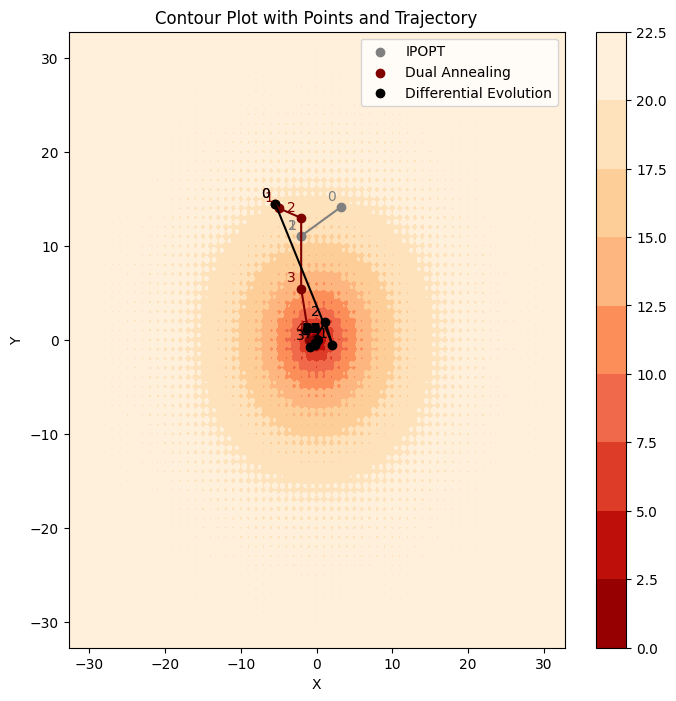

<Figure size 640x480 with 0 Axes>

In [21]:
fig = create_contour_plot(
    problem_name=problem_name,
    problem=problem,
    models=models,
    trajectories=trajectories,
    colormap='OrRd_r',
)